In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

import pprint


## Part 1: Getting the Data





In [2]:
#######################
import myauz
from myauz.myalpha_funcs import (
    read_data,
    persist_data,
    update_csv,
    compose_portfolio,
    retrieveDF,
    string2date,
    retrievePF,
    initialize_df,
    time_sleep,
    create_path_list,
    refresh_db,
    get_daily_symbol,
)

from myauz.myalpha_optimize import (
    pf_filtered,
    symbol_list_filtered,
    determine_earliest_notation,
    calc_weights,
    get_ret_vol_sr,
    neg_sharpe,
    check_sum,
    minimize_volatility,
)


#import importlib
#importlib.reload(myauz.myalpha_funcs)

from myauz.myalpha_libs_universal import StocksDb

import pprint


from datetime import date
#from datetime import datetime
import datetime
import pandas as pd



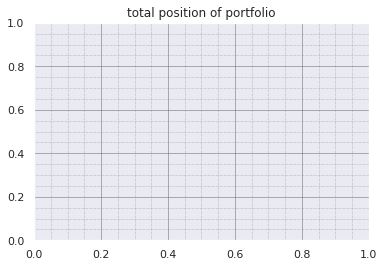

In [3]:
import seaborn as sns 
sns.set()
#sns.reset_orig
plt.figure()
plt.title("total position of portfolio")
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='dimgray')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

In [4]:
alphaDB = StocksDb()
alphaDB.check_path()
print("\n", alphaDB.api_key_alpha)


api_key_alpha = alphaDB.api_key_alpha
root_path = alphaDB.path
print('root_path: ',root_path)

read_from_alphavantage = True
rename_column = True


usecols = ["timestamp", "close"]
startd = "2020-01-01"
# endd = "2020-12-31"
#from datetime import datetime
endd = datetime.datetime.today().strftime('%Y-%m-%d')
print('usecols:', usecols)
print('startd',startd)
print('endd',endd)


Directory  /home/pi/Documents/Python/data  already exists

 JP7SMFY0WV365JKL
root_path:  /home/pi/Documents/Python
usecols: ['timestamp', 'close']
startd 2020-01-01
endd 2021-12-28


In [5]:

symbol_list_full_refresh = [
    "SPY",
]
full_refresh_alphavantage = True

refresh_db(root_path, api_key_alpha, symbol_list_full_refresh, full_refresh_alphavantage)

    timestamp    open    high     low   close     volume
0  2021-12-27  472.06  477.31  472.01  477.26   56808619
1  2021-12-23  468.75  472.19  468.64  470.60   56439745
2  2021-12-22  462.79  467.81  462.58  467.69   58890223
3  2021-12-21  458.61  463.21  456.31  463.06   69806260
4  2021-12-20  454.48  455.40  451.14  454.98  107134822
('Directory ', '/home/pi/Documents/Python/data/SPY', ' already exists')
('_____________________________', 1)
SPY 1
<built-in method values of dict object at 0x7f663d0af8>
('\n\t', '/home/pi/Documents/Python/data/SPY/daily_SPY.csv')
('Last Modified Time : ', '2021-12-28 13:30:37')
2021-12-28 13:30:37


In [6]:
# importcsv data from alpha_vantage from scratch (everything since year 2000) and store it in data folder
#create a data folder
#example: import csv data for Procter&Gamble and SPY (etf which mimicks S&P 500 index)
#you alway need to import and store a symbol once you can work with its csv.
#if you don't the ticker symbol use alpha vantage for google sheets functionality (extension)
#after importing extension and registered you api_key use formula =AVSearchEquitySymbol("<some symbol_description")
#example: =AVSearchEquitySymbol("bayer") this will output for example the ticker-symbol: BAYN.DEX

symbol_list = [
   "MSFT",
   "GOOG",    
   "DHR",
   "EMR",
   "ATR",
]

# persist_data(symbol_list_full_refresh, _dict, _path_list)

refresh_db(root_path, api_key_alpha, symbol_list, full_refresh_alphavantage)

    timestamp    open     high     low   close    volume
0  2021-12-27  335.46  342.480  335.43  342.45  19947029
1  2021-12-23  332.75  336.390  332.73  334.69  19617848
2  2021-12-22  328.30  333.605  325.75  333.20  24831493
3  2021-12-21  323.29  327.730  319.80  327.29  24740597
4  2021-12-20  320.05  322.800  317.57  319.91  28326532
('Directory ', '/home/pi/Documents/Python/data/MSFT', ' already exists')
('_____________________________', 1)
MSFT 1
<built-in method values of dict object at 0x7f661b1ca8>
('\n\t', '/home/pi/Documents/Python/data/MSFT/daily_MSFT.csv')
('Last Modified Time : ', '2021-12-28 13:30:38')
2021-12-28 13:30:38
    timestamp       open       high        low    close   volume
0  2021-12-27  2949.2700  2968.5300  2945.0000  2961.28   662966
1  2021-12-23  2941.7900  2971.4519  2939.0168  2942.85   690934
2  2021-12-22  2882.0000  2946.0600  2879.2600  2938.98   922024
3  2021-12-21  2863.0000  2893.8413  2834.7000  2884.41   977597
4  2021-12-20  2813.5919  28

In [7]:
symbol_list = [
   "NVS",
   "NVZMY",    
   "CL",
   "MCD",    
   "HEINY",
]

# persist_data(symbol_list_full_refresh, _dict, _path_list)

refresh_db(root_path, api_key_alpha, symbol_list, full_refresh_alphavantage)

symbol_list = [
   "HXGBY",
   "LDSVF", 
]

# persist_data(symbol_list_full_refresh, _dict, _path_list)

refresh_db(root_path, api_key_alpha, symbol_list, full_refresh_alphavantage)


# see if specific symbol exists in alpha-vantage db
"""

symbol = "4GP.FRK"
function="TIME_SERIES_DAILY_ADJUSTED"
url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize=full&apikey={api_key_alpha}&datatype=csv"
_df = pd.read_csv(url)
_df.head()¿

"""

    timestamp   open     high      low  close   volume
0  2021-12-27  87.19  87.7400  86.9900  87.61  2222403
1  2021-12-23  86.79  87.1600  86.5150  86.66  3188150
2  2021-12-22  85.52  86.3700  85.3200  86.31  2104394
3  2021-12-21  85.83  86.0900  85.3850  85.99  2798404
4  2021-12-20  85.48  85.6892  85.1301  85.35  3225674
('Directory ', '/home/pi/Documents/Python/data/NVS', ' already exists')
('_____________________________', 1)
NVS 1
<built-in method values of dict object at 0x7f661abee8>
('\n\t', '/home/pi/Documents/Python/data/NVS/daily_NVS.csv')
('Last Modified Time : ', '2021-12-28 13:31:56')
2021-12-28 13:31:56
    timestamp   open    high    low  close  volume
0  2021-12-27  80.05  80.460  79.25  80.37    7091
1  2021-12-23  78.99  79.656  78.58  78.93   10902
2  2021-12-22  78.67  79.640  78.67  79.41    9555
3  2021-12-21  78.64  78.762  78.17  78.60   71679
4  2021-12-20  78.04  78.260  77.45  77.98   39231
('Directory ', '/home/pi/Documents/Python/data/NVZMY', ' alread

'\n\nsymbol = "4GP.FRK"\nfunction="TIME_SERIES_DAILY_ADJUSTED"\nurl = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize=full&apikey={api_key_alpha}&datatype=csv"\n_df = pd.read_csv(url)\n_df.head()¿\n\n'

In [8]:
symbol_list_short = [
    "PG",
    "AMZN",
]


refresh_db(root_path, api_key_alpha, symbol_list_short, full_refresh_alphavantage)

    timestamp    open    high      low   close   volume
0  2021-12-27  160.67  161.99  160.610  161.97  4548828
1  2021-12-23  159.50  160.92  159.440  160.10  5640972
2  2021-12-22  157.77  159.58  157.270  159.32  6626414
3  2021-12-21  157.65  158.15  156.790  157.76  6946009
4  2021-12-20  156.60  158.46  156.568  157.86  9202608
('Directory ', '/home/pi/Documents/Python/data/PG', ' already exists')
('_____________________________', 1)
PG 1
<built-in method values of dict object at 0x7f661e3d38>
('\n\t', '/home/pi/Documents/Python/data/PG/daily_PG.csv')
('Last Modified Time : ', '2021-12-28 13:33:39')
2021-12-28 13:33:39
    timestamp      open       high      low    close   volume
0  2021-12-27  3420.740  3458.8600  3384.31  3393.39  2942341
1  2021-12-23  3408.560  3439.5000  3403.00  3421.37  1839412
2  2021-12-22  3385.395  3441.0000  3370.01  3420.74  2751773
3  2021-12-21  3357.010  3414.3299  3312.95  3408.34  2797791
4  2021-12-20  3337.000  3357.4851  3312.00  3341.58  286

In [9]:
#symbol_list = ["DHR", "GOOG"]

symbol_list = [
   "MSFT",
   "GOOG",    
   "DHR",
   "EMR",
   "ATR",
   "HXGBY",
   "NVS",
   "NVZMY",    
   "CL",
   "MCD",    
   "HEINY",
   "LDSVF",  
]

path_list = create_path_list(symbol_list, root_path)
pprint.pprint(path_list)

bool_list_all = [
   True, #"MSFT", microsoft    
   True, #"GOOG", alphabet google      
#  True, #"AMZN", amazon
   True, #"DHR", danaher
   True, #"EMR", emerson    
   True, #"ATR", aptargroup
   True, #"HXGBY", hexagon
   True, #"NVS", novartis
   True, #"NVZMY", novozymes    
   True, #"CL", colgate palmolive
   True, #"MCD", mcdonalds    
   True, #"HEINY", heineken
   True, #"LDSVF", lindt & spruengli    
]

bool_list_high_tech = [
   True, #"MSFT", microsoft    
   True, #"GOOG", alphabet google      
#  True, #"AMZN", amazon
   False, #"DHR", danaher
   False, #"EMR", emerson    
   False, #"ATR", aptargroup
   False, #"HXGBY", hexagon
   False, #"NVS", novartis
   False, #"NVZMY", novozymes    
   False, #"CL", colgate palmolive
   False, #"MCD", mcdonalds    
   False, #"HEINY", heineken
   False, #"LDSVF", lindt & spruengli    
]

bool_list_industry = [
   False, #"MSFT", microsoft    
   False, #"GOOG", alphabet google      
#  False, #"AMZN", amazon
   True, #"DHR", danaher
   True, #"EMR", emerson    
   True, #"ATR", aptargroup
   True, #"HXGBY", hexagon
   True, #"NVS", novartis
   True, #"NVZMY", novozymes    
   False, #"CL", colgate palmolive
   False, #"MCD", mcdonalds    
   False, #"HEINY", heineken
   False, #"LDSVF", lindt & spruengli    
]

bool_list_consumer = [
   False, #"MSFT", microsoft    
   False, #"GOOG", alphabet google      
#  False, #"AMZN", amazon
   False, #"DHR", danaher
   False, #"EMR", emerson    
   False, #"ATR", aptargroup
   False, #"HXGBY", hexagon
   False, #"NVS", novartis
   False, #"NVZMY", novozymes    
   True, #"CL", colgate palmolive
   True, #"MCD", mcdonalds    
   True, #"HEINY", heineken
   True, #"LDSVF", lindt & spruengli    
]

colors = [
    'magenta',
    'lime',
#   'orange',
    'blue',
    'black',
    'slategrey',
    'brown',
    'olive',
    'darkviolet',
    'red',
    'turquoise',
    'forestgreen',
    'gold',
]

color_dict = dict(zip(symbol_list, colors))
print('\n')
print(color_dict)


{'ATR': '/home/pi/Documents/Python/data/ATR/daily_ATR.csv',
 'CL': '/home/pi/Documents/Python/data/CL/daily_CL.csv',
 'DHR': '/home/pi/Documents/Python/data/DHR/daily_DHR.csv',
 'EMR': '/home/pi/Documents/Python/data/EMR/daily_EMR.csv',
 'GOOG': '/home/pi/Documents/Python/data/GOOG/daily_GOOG.csv',
 'HEINY': '/home/pi/Documents/Python/data/HEINY/daily_HEINY.csv',
 'HXGBY': '/home/pi/Documents/Python/data/HXGBY/daily_HXGBY.csv',
 'LDSVF': '/home/pi/Documents/Python/data/LDSVF/daily_LDSVF.csv',
 'MCD': '/home/pi/Documents/Python/data/MCD/daily_MCD.csv',
 'MSFT': '/home/pi/Documents/Python/data/MSFT/daily_MSFT.csv',
 'NVS': '/home/pi/Documents/Python/data/NVS/daily_NVS.csv',
 'NVZMY': '/home/pi/Documents/Python/data/NVZMY/daily_NVZMY.csv'}


{'MSFT': 'magenta', 'GOOG': 'lime', 'DHR': 'blue', 'EMR': 'black', 'ATR': 'slategrey', 'HXGBY': 'brown', 'NVS': 'olive', 'NVZMY': 'darkviolet', 'CL': 'red', 'MCD': 'turquoise', 'HEINY': 'forestgreen', 'LDSVF': 'gold'}


In [10]:
### create dataframe with portfolio adjusted close
usecols = ["timestamp", "close"]
pf = retrievePF(symbol_list, path_list, startd, endd, usecols, rename_column)
print(pf) 

              MSFT     GOOG     DHR    EMR     ATR    HXGBY    NVS  NVZMY  \
2020-01-02  160.62  1367.37  155.11  77.48  113.68  57.6000  94.95  48.87   
2020-01-03  158.62  1360.66  154.15  76.42  114.04  56.0400  94.79  48.01   
2020-01-06  159.03  1394.21  154.61  77.05  114.05  55.8550  95.43  48.08   
2020-01-07  157.58  1393.34  156.13  77.24  112.91  55.9300  94.48  47.86   
2020-01-08  160.09  1404.32  156.29  77.51  113.22  55.7900  94.48  47.99   
...            ...      ...     ...    ...     ...      ...    ...    ...   
2021-12-20  319.91  2848.03  314.29  89.46  113.67  14.6700  85.35  77.98   
2021-12-21  327.29  2884.41  313.92  91.03  115.39  14.9460  85.99  78.60   
2021-12-22  333.20  2938.98  319.68  89.87  115.39  15.2600  86.31  79.41   
2021-12-23  334.69  2942.85  320.79  91.28  116.33  15.6800  86.66  78.93   
2021-12-27  342.45  2961.28  327.41  92.17  119.89  15.7525  87.61  80.37   

               CL     MCD  HEINY     LDSVF  
2020-01-02  68.12  200.79  53.

In [11]:
#startd_new = string2date('2020-07-01')
#endd_new = string2date('2020-08-01')


startd = '2020-01-01'
included = bool_list_high_tech
#pf1 = pf.loc[startd:,:]
#pf1 = pf.loc[startd:,bool_list_consumer]
#pf1_vol = pf_vol.loc[startd:,:]
#pf1_vol = pf_vol.loc[startd:,bool_list_consumer]
pf1 = pf_filtered(pf,startd,included)
pf2 = pf_filtered(pf,startd,bool_list_industry)
pf3 = pf_filtered(pf,startd,bool_list_consumer)
pprint.pprint(pf1.head(3))
print('\n')


              MSFT     GOOG
2020-01-02  160.62  1367.37
2020-01-03  158.62  1360.66
2020-01-06  159.03  1394.21




In [12]:
startd

'2020-01-01'

In [13]:
endd

'2021-12-28'

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

In [14]:
#tesla['returns']
#(1+tesla['returns'])
#(1+tesla['returns']).cumprod()
df_returns = (pf/pf.shift(1))-1
pprint.pprint(df_returns['MSFT'])
print('\n')
(1+df_returns['MSFT']).cumprod()

2020-01-02         NaN
2020-01-03   -0.012452
2020-01-06    0.002585
2020-01-07   -0.009118
2020-01-08    0.015928
                ...   
2021-12-20   -0.012014
2021-12-21    0.023069
2021-12-22    0.018057
2021-12-23    0.004472
2021-12-27    0.023186
Name: MSFT, Length: 501, dtype: float64




2020-01-02         NaN
2020-01-03    0.987548
2020-01-06    0.990101
2020-01-07    0.981073
2020-01-08    0.996700
                ...   
2021-12-20    1.991720
2021-12-21    2.037667
2021-12-22    2.074461
2021-12-23    2.083738
2021-12-27    2.132051
Name: MSFT, Length: 501, dtype: float64

In [15]:
#tesla['cumRet']=(1+tesla['returns']).cumprod()
#tesla.head(10)
#gm['cumRet']=(1+gm['returns']).cumprod()
#ford['cumRet']=(1+ford['returns']).cumprod()

df_cumReturns = initialize_df(symbol_list, startd, endd)
df_cumReturns = (1+df_returns).cumprod()
df_cumReturns.head()



,MSFT,GOOG,DHR,EMR,ATR,HXGBY,NVS,NVZMY,CL,MCD,HEINY,LDSVF
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.987548,0.995093,0.993811,0.986319,1.003167,0.972917,0.998315,0.982402,0.998532,0.996464,0.999440,1.000000
2020-01-06,0.990101,1.019629,0.996776,0.994450,1.003255,0.969705,1.005055,0.983835,1.005432,1.007670,1.021841,1.005652
2020-01-07,0.981073,1.018993,1.006576,0.996902,0.993227,0.971007,0.995050,0.979333,0.991632,1.009164,1.014187,1.023909
2020-01-08,0.996700,1.027023,1.007608,1.000387,0.995954,0.968576,0.995050,0.981993,1.016882,1.025499,1.017547,1.023909


<Figure size 432x288 with 0 Axes>

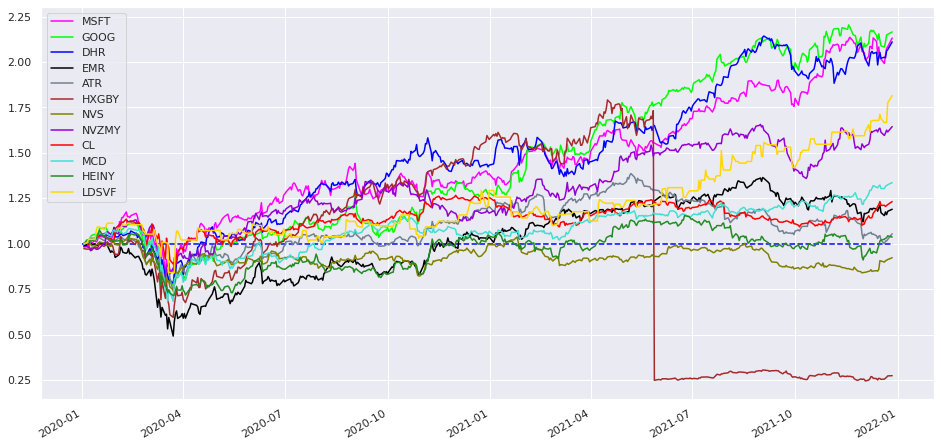

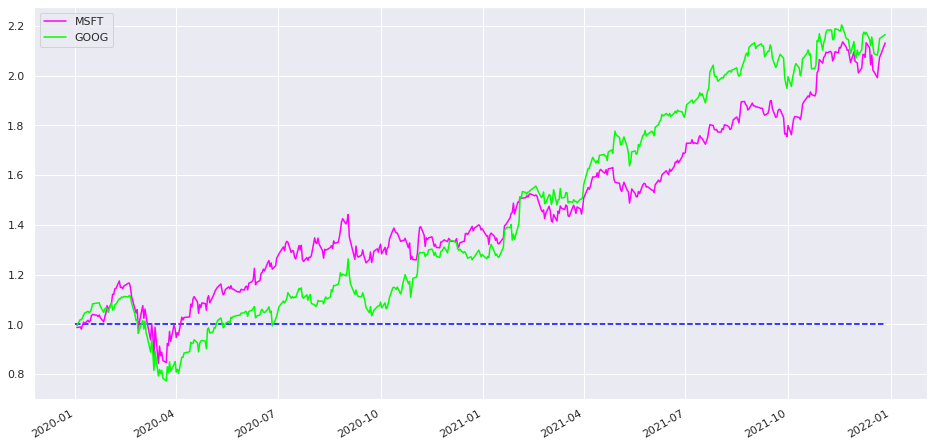

In [16]:
#tesla['cumRet'].plot(label='Tesla', figsize=(16,8))
#gm['cumRet'].plot(label='gm', figsize=(16,8))
#ford['cumRet'].plot(label='Ford', figsize=(16,8));
import seaborn as sns 
sns.set()
#sns.reset_orig
plt.figure()

color_list = [color_dict.get(x, _) for x in pf.columns]
df_cumReturns.plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

color_list = [color_dict.get(x, _) for x in pf1.columns]
df_cumReturns[['MSFT','GOOG']].plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);



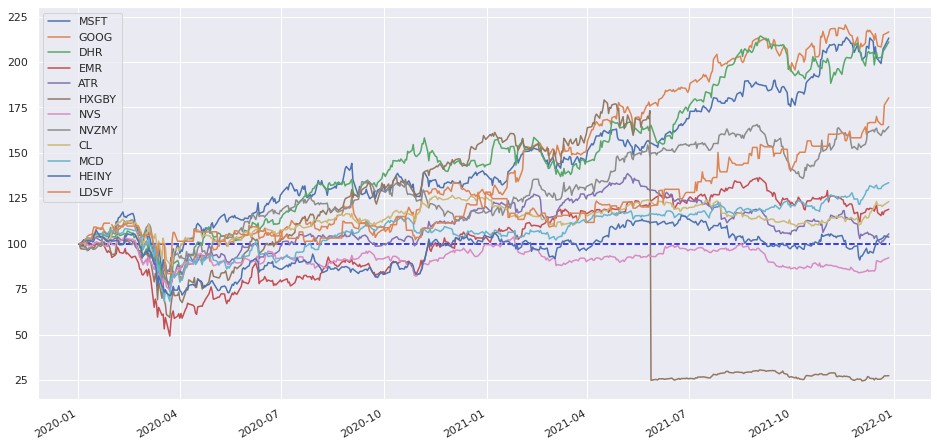

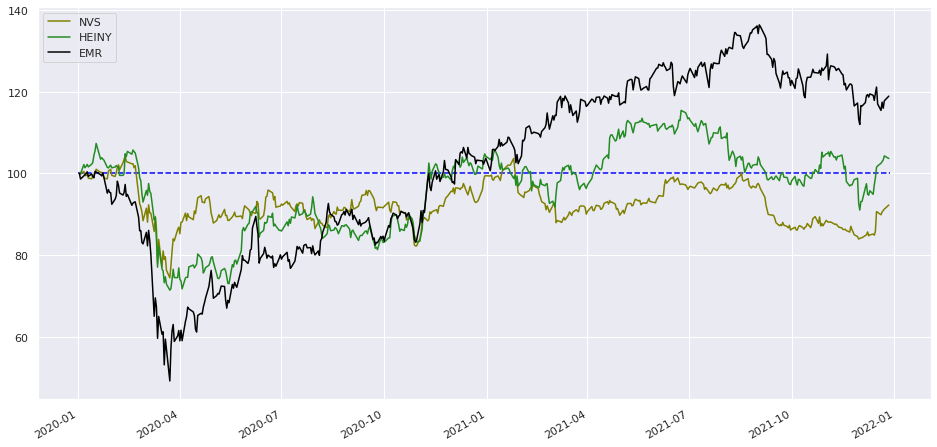

In [17]:
(pf / pf.iloc[0] * 100).plot(figsize=(16, 8))
plt.hlines(100, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

color_list = [color_dict.get(x, _) for x in ['NVS','HEINY','EMR']]
(pf[['NVS','HEINY','EMR']] / pf[['NVS','HEINY','EMR']].iloc[0] * 100).plot(color=color_list,figsize=(16, 8))
plt.hlines(100, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

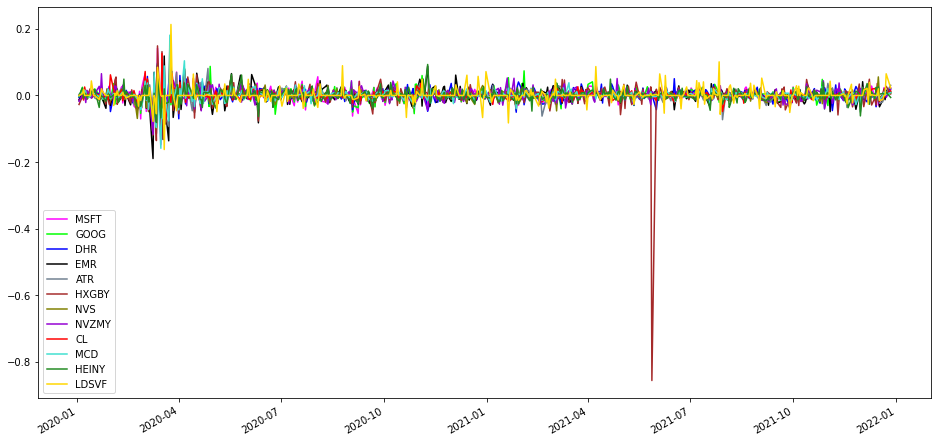

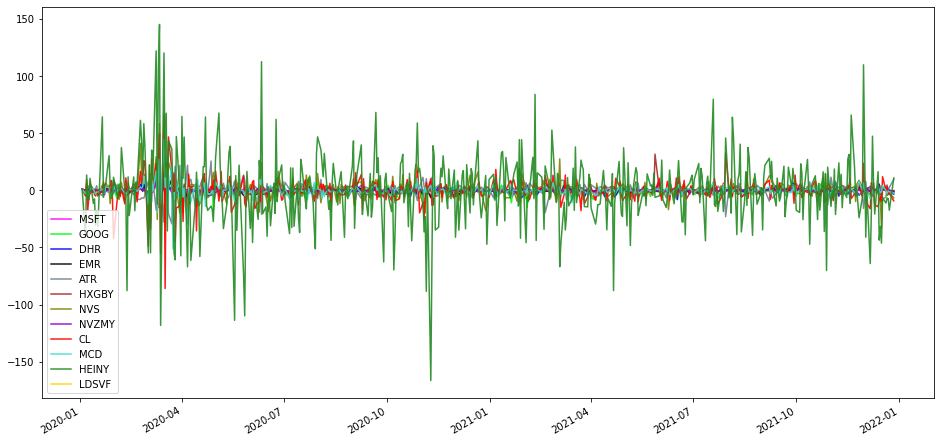

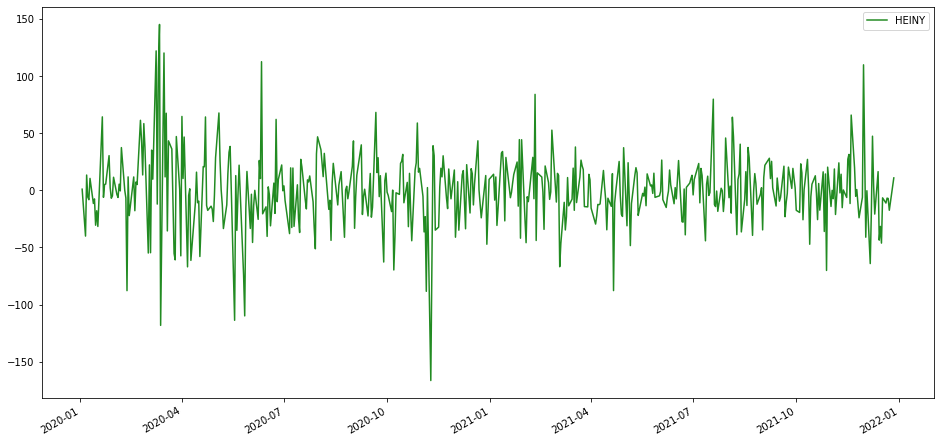

In [18]:
df_returns.head()
sns.reset_orig()

color_list = [color_dict.get(x, _) for x in df_returns.columns]

color_list

df_returns.plot(color=color_list, figsize=(16,8));
(df_returns / df_returns.iloc[1]).plot(color=color_list,figsize=(16,8), alpha=0.9);

(df_returns[['HEINY']] / df_returns[['HEINY']].iloc[1]).plot(color='forestgreen',figsize=(16,8));




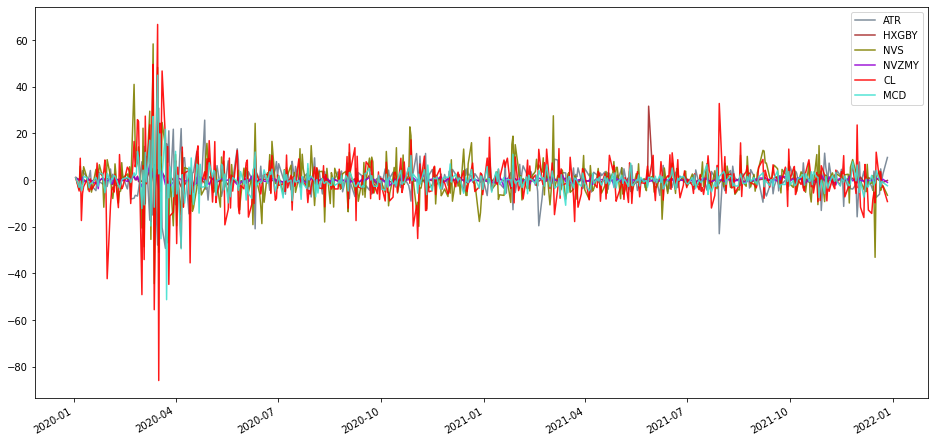

In [19]:
color_list = [color_dict.get(x, _) for x in ['ATR','HXGBY','NVS','NVZMY','CL','MCD']]
(df_returns[['ATR','HXGBY','NVS','NVZMY','CL','MCD']] / df_returns[['ATR','HXGBY','NVS','NVZMY','CL','MCD']].iloc[1]).plot(color=color_list,figsize=(16,8), alpha=0.9);


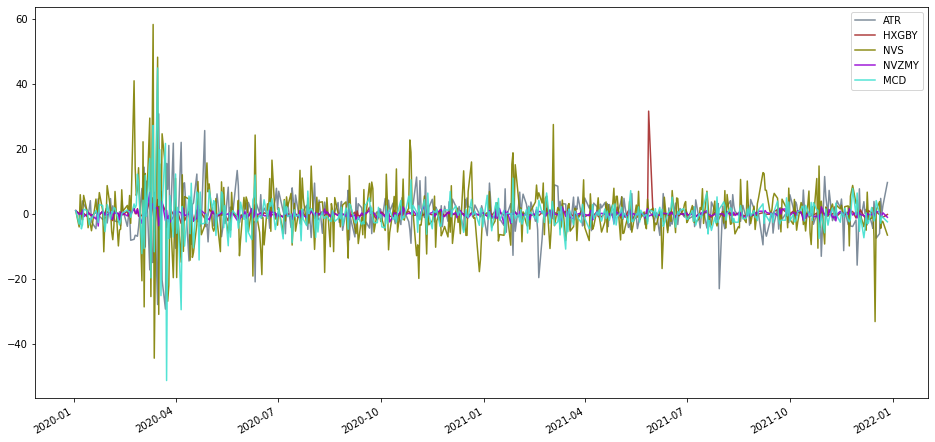

In [20]:
color_list = [color_dict.get(x, _) for x in ['ATR','HXGBY','NVS','NVZMY','MCD']]
(df_returns[['ATR','HXGBY','NVS','NVZMY','MCD']] / df_returns[['ATR','HXGBY','NVS','NVZMY','MCD']].iloc[1]).plot(color=color_list,figsize=(16,8), alpha=0.9);


** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

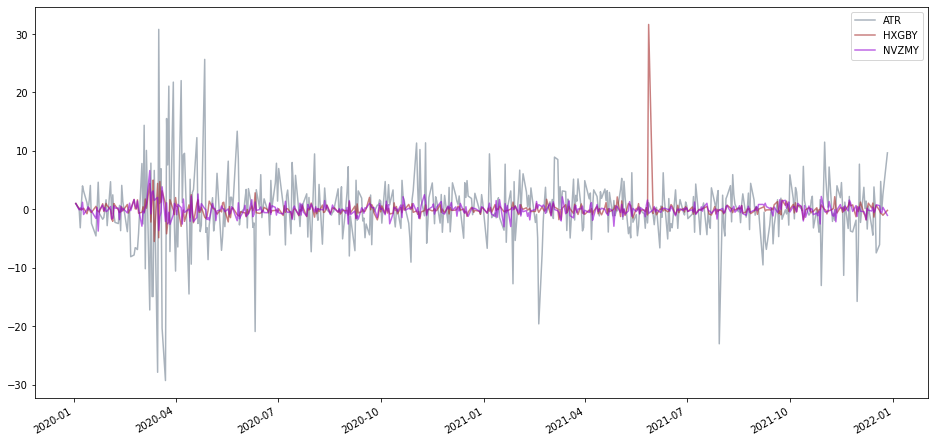

In [21]:
color_list = [color_dict.get(x, _) for x in ['ATR','HXGBY','NVZMY']]
(df_returns[['ATR','HXGBY','NVZMY']] / df_returns[['ATR','HXGBY','NVZMY']].iloc[1]).plot(color=color_list,figsize=(16,8), alpha=0.6);


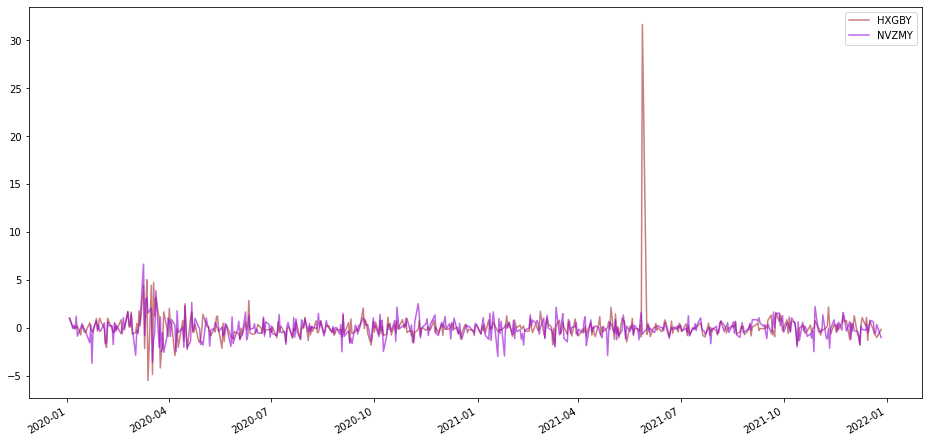

In [22]:
color_list = [color_dict.get(x, _) for x in ['HXGBY','NVZMY']]
(df_returns[['HXGBY','NVZMY']] / df_returns[['HXGBY','NVZMY']].iloc[1]).plot(color=color_list,figsize=(16,8), alpha=0.6);



# Great Job!

That is it for thsi very basic analysis, this concludes this half of the course, which focuses much more on learning the tools of the trade. The second half of the course is where we really dive into functionality designed for time series, quantitative analysis, algorithmic trading, and much more!

In [23]:
#del [_df]
#gc.collect()
#_df=pd.DataFrame()
symbol_list = [
   "MSFT",
   "GOOG",    
   "AMZN",    
   "DHR",
   "EMR",
   "ATR",
   "HXGBY",
   "NVS",
   "NVZMY",    
   "CL",
   "MCD",    
   "HEINY",
   "LDSVF",  
]

usecols = ["timestamp", "close"]

path_list = create_path_list(symbol_list, root_path)
pprint.pprint(path_list)
df_aux1 = retrievePF(symbol_list, path_list, startd, endd,usecols)
df_aux1.head()
        

{'AMZN': '/home/pi/Documents/Python/data/AMZN/daily_AMZN.csv',
 'ATR': '/home/pi/Documents/Python/data/ATR/daily_ATR.csv',
 'CL': '/home/pi/Documents/Python/data/CL/daily_CL.csv',
 'DHR': '/home/pi/Documents/Python/data/DHR/daily_DHR.csv',
 'EMR': '/home/pi/Documents/Python/data/EMR/daily_EMR.csv',
 'GOOG': '/home/pi/Documents/Python/data/GOOG/daily_GOOG.csv',
 'HEINY': '/home/pi/Documents/Python/data/HEINY/daily_HEINY.csv',
 'HXGBY': '/home/pi/Documents/Python/data/HXGBY/daily_HXGBY.csv',
 'LDSVF': '/home/pi/Documents/Python/data/LDSVF/daily_LDSVF.csv',
 'MCD': '/home/pi/Documents/Python/data/MCD/daily_MCD.csv',
 'MSFT': '/home/pi/Documents/Python/data/MSFT/daily_MSFT.csv',
 'NVS': '/home/pi/Documents/Python/data/NVS/daily_NVS.csv',
 'NVZMY': '/home/pi/Documents/Python/data/NVZMY/daily_NVZMY.csv'}


,MSFT,GOOG,AMZN,DHR,EMR,ATR,HXGBY,NVS,NVZMY,CL,MCD,HEINY,LDSVF
2020-01-02,160.62,1367.37,1898.01,155.11,77.48,113.68,57.600,94.95,48.87,68.12,200.79,53.57,7696.0
2020-01-03,158.62,1360.66,1874.97,154.15,76.42,114.04,56.040,94.79,48.01,68.02,200.08,53.54,7696.0
2020-01-06,159.03,1394.21,1902.88,154.61,77.05,114.05,55.855,95.43,48.08,68.49,202.33,54.74,7739.5
2020-01-07,157.58,1393.34,1906.86,156.13,77.24,112.91,55.930,94.48,47.86,67.55,202.63,54.33,7880.0
2020-01-08,160.09,1404.32,1891.97,156.29,77.51,113.22,55.790,94.48,47.99,69.27,205.91,54.51,7880.0


In [24]:
print('root_path:',root_path)

root_path: /home/pi/Documents/Python


#  Sharpe RATIO

In [25]:

symbol_list=['AAPL','AMZN','CSCO','MSFT']
startd='2012-01-01'
endd='2017-01-01'
for symbol in symbol_list:
    if symbol == 'AAPL':
        aapl = get_daily_symbol(symbol,root_path,startd,endd)
        print("symbol: " + symbol)

    elif symbol == 'AMZN':
        amzn = get_daily_symbol(symbol,root_path,startd,endd)
        print("symbol: " + symbol)
  
    elif symbol == 'CSCO':
        csco = get_daily_symbol(symbol,root_path,startd,endd)
        print("symbol: " + symbol)
 
    elif symbol == 'MSFT':
        msft = get_daily_symbol(symbol,root_path,startd,endd)
        print("symbol: " + symbol)


('Directory ', '/home/pi/Documents/Python/data/AAPL', ' already exists')
symbol: AAPL
('Directory ', '/home/pi/Documents/Python/data/AMZN', ' already exists')
symbol: AMZN
('Directory ', '/home/pi/Documents/Python/data/CSCO', ' already exists')
symbol: CSCO
('Directory ', '/home/pi/Documents/Python/data/MSFT', ' already exists')
symbol: MSFT


In [26]:
aapl.iloc[0]['close']

411.23

In [27]:
# cumulative returns:
for stock in (aapl, csco, amzn, msft):
    stock['cum_return'] = stock['close'] / stock.iloc[0]['close']

    

In [28]:
aapl.head()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,cum_return
timestamp,,,,,,,,,
2012-01-03,409.4000,412.50,409.00,411.23,12.6899,10793600,0.0,1.0,1.000000
2012-01-04,410.0000,414.68,409.28,413.44,12.7581,9286500,0.0,1.0,1.005374
2012-01-05,414.9500,418.55,412.67,418.03,12.8997,9688200,0.0,1.0,1.016536
2012-01-06,419.7700,422.75,419.22,422.40,13.0346,11367600,0.0,1.0,1.027162
2012-01-09,425.5001,427.75,421.35,421.73,13.0139,14072300,0.0,1.0,1.025533


In [29]:
aapl.tail()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,cum_return
timestamp,,,,,,,,,
2016-12-23,115.59,116.5200,115.59,116.52,27.6328,14249484,0.0,1.0,0.283345
2016-12-27,116.52,117.8000,116.49,117.26,27.8083,18296855,0.0,1.0,0.285145
2016-12-28,117.52,118.0166,116.20,116.76,27.6898,20905892,0.0,1.0,0.283929
2016-12-29,116.45,117.1095,116.40,116.73,27.6826,15039519,0.0,1.0,0.283856
2016-12-30,116.65,117.2000,115.43,115.82,27.4668,30586265,0.0,1.0,0.281643


In [30]:
# a list of tuples (first element is the dataframe of the stock and second element is 0.3)
list(zip((aapl, csco, amzn, msft), [.3, .2, .4, .1]));

In [31]:
aapl.head()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,cum_return
timestamp,,,,,,,,,
2012-01-03,409.4000,412.50,409.00,411.23,12.6899,10793600,0.0,1.0,1.000000
2012-01-04,410.0000,414.68,409.28,413.44,12.7581,9286500,0.0,1.0,1.005374
2012-01-05,414.9500,418.55,412.67,418.03,12.8997,9688200,0.0,1.0,1.016536
2012-01-06,419.7700,422.75,419.22,422.40,13.0346,11367600,0.0,1.0,1.027162
2012-01-09,425.5001,427.75,421.35,421.73,13.0139,14072300,0.0,1.0,1.025533


In [32]:
# allocation to portfolio
# 30% aapl
# 20% amzn
# 40% csco
# 10% msft
aapl.head()
for stock, weight in zip((aapl, csco, amzn, msft), [.3, .2, .4, .1]):
    stock['weight'] = stock['cum_return']*weight
    
    




In [33]:
aapl.head()
# 30% of my money is in apple so this is my cum return portfolio wise

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,cum_return,weight
timestamp,,,,,,,,,,
2012-01-03,409.4000,412.50,409.00,411.23,12.6899,10793600,0.0,1.0,1.000000,0.300000
2012-01-04,410.0000,414.68,409.28,413.44,12.7581,9286500,0.0,1.0,1.005374,0.301612
2012-01-05,414.9500,418.55,412.67,418.03,12.8997,9688200,0.0,1.0,1.016536,0.304961
2012-01-06,419.7700,422.75,419.22,422.40,13.0346,11367600,0.0,1.0,1.027162,0.308149
2012-01-09,425.5001,427.75,421.35,421.73,13.0139,14072300,0.0,1.0,1.025533,0.307660


In [34]:
#investing 1Mio $ - calculate the position value of each stock according to its weight in the portfolio
for stock in (aapl, csco, amzn, msft):
    stock['pos_value'] = stock['weight']*100000
    
    

In [35]:
aapl.head()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,cum_return,weight,pos_value
timestamp,,,,,,,,,,,
2012-01-03,409.4000,412.50,409.00,411.23,12.6899,10793600,0.0,1.0,1.000000,0.300000,30000.000000
2012-01-04,410.0000,414.68,409.28,413.44,12.7581,9286500,0.0,1.0,1.005374,0.301612,30161.223646
2012-01-05,414.9500,418.55,412.67,418.03,12.8997,9688200,0.0,1.0,1.016536,0.304961,30496.072757
2012-01-06,419.7700,422.75,419.22,422.40,13.0346,11367600,0.0,1.0,1.027162,0.308149,30814.872456
2012-01-09,425.5001,427.75,421.35,421.73,13.0139,14072300,0.0,1.0,1.025533,0.307660,30765.994699


In [36]:
all_pos_vals = [aapl['pos_value'], csco['pos_value'], amzn['pos_value'], msft['pos_value']]
#all_pos_vals
pf = pd.concat(all_pos_vals, axis = 1)
pf.columns = ['aapl', 'csco', 'amzn', 'msft']
pf.head()

,aapl,csco,amzn,msft
timestamp,,,,
2012-01-03,30000.000000,20000.000000,40000.000000,10000.000000
2012-01-04,30161.223646,20386.473430,39660.392113,10237.250140
2012-01-05,30496.072757,20311.325819,39682.734737,10341.864375
2012-01-06,30814.872456,20236.178207,40799.865944,10500.653839
2012-01-09,30765.994699,20365.002684,39894.989667,10364.281711


In [37]:
# total position
pf['total_pos']=pf.sum(axis=1)
pf.head()

,aapl,csco,amzn,msft,total_pos
timestamp,,,,,
2012-01-03,30000.000000,20000.000000,40000.000000,10000.000000,100000.000000
2012-01-04,30161.223646,20386.473430,39660.392113,10237.250140,100445.339329
2012-01-05,30496.072757,20311.325819,39682.734737,10341.864375,100831.997688
2012-01-06,30814.872456,20236.178207,40799.865944,10500.653839,102351.570446
2012-01-09,30765.994699,20365.002684,39894.989667,10364.281711,101390.268760


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline


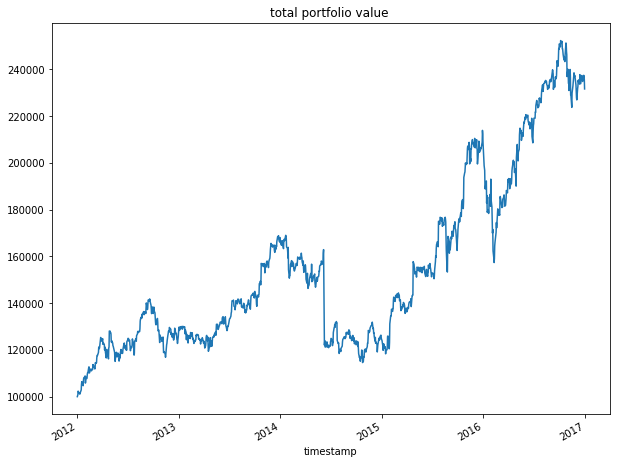

In [39]:
pf['total_pos'].plot(figsize=(10,8))
plt.title('total portfolio value ');

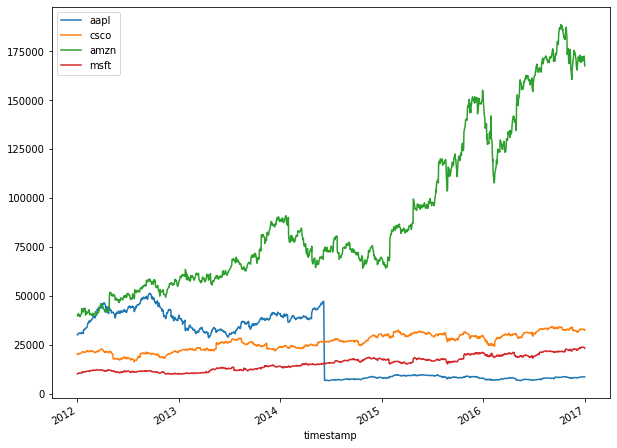

In [40]:
pf.drop('total_pos', axis = 1).plot(figsize=(10,8));

In [41]:
pf['daily_return']= pf['total_pos'].pct_change(1)
pf.head()

,aapl,csco,amzn,msft,total_pos,daily_return
timestamp,,,,,,
2012-01-03,30000.000000,20000.000000,40000.000000,10000.000000,100000.000000,NaN
2012-01-04,30161.223646,20386.473430,39660.392113,10237.250140,100445.339329,0.004453
2012-01-05,30496.072757,20311.325819,39682.734737,10341.864375,100831.997688,0.003849
2012-01-06,30814.872456,20236.178207,40799.865944,10500.653839,102351.570446,0.015070
2012-01-09,30765.994699,20365.002684,39894.989667,10364.281711,101390.268760,-0.009392


In [42]:
pf['daily_return'].std()

0.015516633856046498

In [43]:
pf['daily_return'].mean()

0.0007935785341364513

<AxesSubplot:ylabel='Density'>

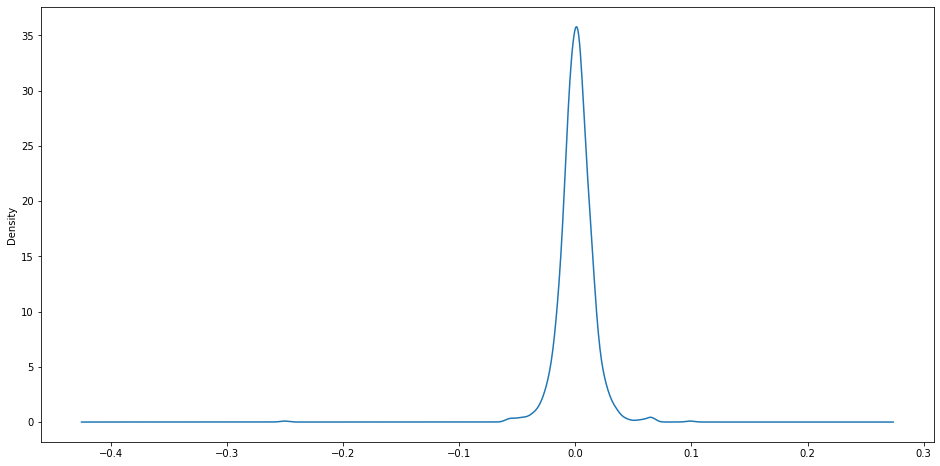

In [44]:
pf['daily_return'].plot(kind='kde', figsize=(16,8))

In [45]:
cum_return = 100 * ((pf['total_pos'][-1] - pf['total_pos'][0])/pf['total_pos'][0] )
cum_return

131.64910703147797

In [46]:
pf['total_pos'][-1]

231649.10703147796

In [47]:
#calculate sharpe ratio assume risk-free rate to be zero
sharp_ratio = pf['daily_return'].mean() / pf['daily_return'].std()
sharp_ratio

0.05114373010916996

In [48]:
# annualize thi sr 
# asr should be above 1 

sharp_ratio_annual = (252**0.5)*sharp_ratio
sharp_ratio_annual

0.8118815459344201

# portfolio optimization
# - monte carlo
# - mathematical optimization by minimizing the negative sharpe ratio

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
    

In [50]:
pf = pd.concat([aapl['close'],csco['close'],amzn['close'], msft['close']], axis=1)

pf.columns = ['aapl', 'csco', 'amzn', 'msft']

pf.head()

,aapl,csco,amzn,msft
timestamp,,,,
2012-01-03,411.23,18.63,179.03,26.765
2012-01-04,413.44,18.99,177.51,27.400
2012-01-05,418.03,18.92,177.61,27.680
2012-01-06,422.40,18.85,182.61,28.105
2012-01-09,421.73,18.97,178.56,27.740


In [51]:
#calculate annual mean of returns as % 
pf.pct_change(1).mean()*252

aapl   -0.004316
csco    0.122809
amzn    0.334731
msft    0.196121
dtype: float64

In [52]:
pf.pct_change(1).corr()

,aapl,csco,amzn,msft
aapl,1.000000,0.171324,0.142288,0.188958
csco,0.171324,1.000000,0.284127,0.420254
amzn,0.142288,0.284127,1.000000,0.351169
msft,0.188958,0.420254,0.351169,1.000000


In [53]:
# we use log returns for algorithms especially for normalizations
log_ret= np.log(pf/pf.shift(1))

log_ret.head()


,aapl,csco,amzn,msft
timestamp,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.008526,0.023448
2012-01-05,0.011041,-0.003693,0.000563,0.010167
2012-01-06,0.010400,-0.003707,0.027763,0.015237
2012-01-09,-0.001587,0.006346,-0.022428,-0.013072


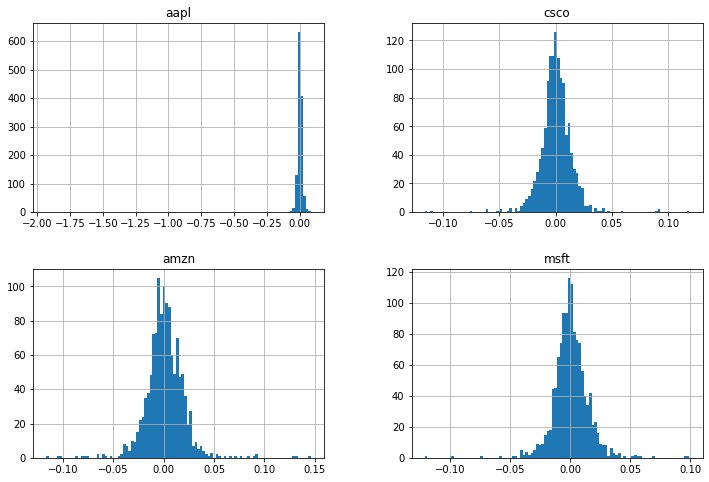

In [54]:
log_ret.hist(bins=100, figsize=(12,8));

In [55]:
log_ret.mean()

aapl   -0.001008
csco    0.000385
amzn    0.001139
msft    0.000670
dtype: float64

In [56]:
log_ret.var()*252
#log_ret.std()*252**0.5

aapl    0.815597
csco    0.051631
amzn    0.094472
msft    0.054436
dtype: float64

In [57]:
log_ret.cov() * 252

,aapl,csco,amzn,msft
aapl,0.815597,0.018365,0.022026,0.021723
csco,0.018365,0.051631,0.019981,0.022325
amzn,0.022026,0.019981,0.094472,0.024911
msft,0.021723,0.022325,0.024911,0.054436


In [58]:
np.random.seed(101)
# to keep getting the same random weights

print(pf.columns)
weights = np.array(np.random.random(4))
print(weights)
# but they do not add up to 1

print('rebalance')
weights=weights/np.sum(weights)
print(weights)
np.sum(weights)


Index(['aapl', 'csco', 'amzn', 'msft'], dtype='object')
[0.51639863 0.57066759 0.02847423 0.17152166]
rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]


1.0000000000000002

In [59]:
print('expected portfolio return')
exp_ret = np.sum((log_ret.mean() * weights) * 252)
print((log_ret.mean() * weights) * 252)
exp_ret
print(exp_ret)
print('\n expected volatility')
#denominator of sharp-ratio

exp_vol = np.sqrt(np.dot((weights.T),np.dot(log_ret.cov()*252, weights)))
print(exp_vol)

sr = exp_ret / exp_vol
print('\n sharpe ratio: ')
print(sr)


expected portfolio return
aapl   -0.101922
csco    0.042998
amzn    0.006353
msft    0.022503
dtype: float64
-0.03006709848111488

 expected volatility
0.3935519402799769

 sharpe ratio: 
-0.07639931455991511


In [60]:
import numpy as np
np.random.seed(101)
num_pf = 5000
all_weights = np.zeros((num_pf, len(pf.columns)))
ret_arr = np.zeros(num_pf)
vol_arr = np.zeros(num_pf)
sharpe_arr = np.zeros(num_pf)

for ind in range(num_pf):
    weights = np.array(np.random.random(4))
    weights = weights / np.sum(weights)
    all_weights[ind,:] = weights
    # expected return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252)
    #expected volatility
    vol_arr[ind] = np.sqrt(np.dot((weights.T),np.dot(log_ret.cov()*252, weights)))
    #sharpe ratio
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]
    
print('done')





done


In [61]:
print(sharpe_arr.max())
sharpe_arr


1.023287655623132


array([-0.07639931,  0.19061601,  0.07503683, ...,  0.85807189,
       -0.04671145,  0.19029015])

In [62]:
sharpe_arr.argmax()

326

In [63]:
print(sharpe_arr[2936])
all_weights[2936,:]

0.5705451986783798


array([0.16917552, 0.04322089, 0.40661528, 0.38098831])

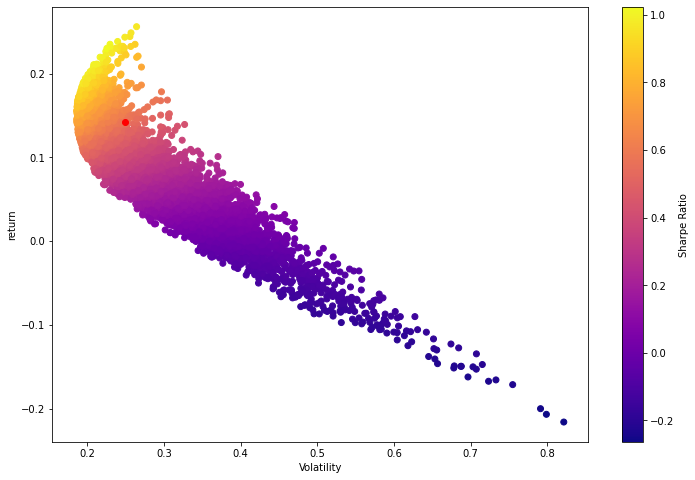

In [64]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr, c= sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('return')

max_sr_ret = ret_arr[2936]
max_sr_vol = vol_arr[2936]
plt.scatter(max_sr_vol, max_sr_ret,  c='red')
           


# using ML approach

In [65]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)  * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
    sr = ret / vol
    return np.array([ret,vol,sr])

            

In [66]:
from scipy.optimize import minimize 
import numpy as np


In [67]:
#helper function
#minimize negative sharpe ratio which is the same as maximize sr
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [68]:
log_ret.head()

,aapl,csco,amzn,msft
timestamp,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.008526,0.023448
2012-01-05,0.011041,-0.003693,0.000563,0.010167
2012-01-06,0.010400,-0.003707,0.027763,0.015237
2012-01-09,-0.001587,0.006346,-0.022428,-0.013072


In [69]:
def check_sum(weights):
    #return 0 if the sum of the weights is 1
    return np.sum(weights) - 1


In [70]:
cons = ({'type': 'eq', 'fun':check_sum})
#defines a constraint for minimize function - it says
# type will be equations and a function

In [71]:
bounds = ((0,1),(0,1), (0,1),(0,1))
#sum of weights is 1 
init_guess = [0.25,0.25,0.25,0.25]

In [72]:
#opt_results = minimize(neg_sharpe, )
help(minimize)


Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [73]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds,constraints=cons )
opt_results

     fun: -1.0267813572321325
     jac: array([ 1.54940777e+00,  4.98414040e-04,  5.75780869e-05, -9.55611467e-05])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([2.00176679e-16, 1.70342026e-02, 5.57942551e-01, 4.25023246e-01])

In [74]:
if (np.sum(opt_results.x)) == 1:
    print("ok")

get_ret_vol_sr(opt_results.x)


ok


array([0.23363666, 0.22754275, 1.02678136])

In [75]:
# create an array of possible returns  y-values
frontier_y = np.linspace(0,0.3,100)
frontier_y

    

array([0.        , 0.0030303 , 0.00606061, 0.00909091, 0.01212121,
       0.01515152, 0.01818182, 0.02121212, 0.02424242, 0.02727273,
       0.03030303, 0.03333333, 0.03636364, 0.03939394, 0.04242424,
       0.04545455, 0.04848485, 0.05151515, 0.05454545, 0.05757576,
       0.06060606, 0.06363636, 0.06666667, 0.06969697, 0.07272727,
       0.07575758, 0.07878788, 0.08181818, 0.08484848, 0.08787879,
       0.09090909, 0.09393939, 0.0969697 , 0.1       , 0.1030303 ,
       0.10606061, 0.10909091, 0.11212121, 0.11515152, 0.11818182,
       0.12121212, 0.12424242, 0.12727273, 0.13030303, 0.13333333,
       0.13636364, 0.13939394, 0.14242424, 0.14545455, 0.14848485,
       0.15151515, 0.15454545, 0.15757576, 0.16060606, 0.16363636,
       0.16666667, 0.16969697, 0.17272727, 0.17575758, 0.17878788,
       0.18181818, 0.18484848, 0.18787879, 0.19090909, 0.19393939,
       0.1969697 , 0.2       , 0.2030303 , 0.20606061, 0.20909091,
       0.21212121, 0.21515152, 0.21818182, 0.22121212, 0.22424

In [76]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [77]:
frontier_volatility = []
#for a possible return what is the risk
#in order to get the return/volatility combinations on the efficient frontier 
#we add the second constraint
for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},{'type':'eq', 'fun':lambda w: (get_ret_vol_sr(w)[0]-possible_return)})
    result = minimize(minimize_volatility, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
    frontier_volatility.append(result['fun'])
    
    
#frontier_volatility
    

In [78]:
frontier_sr = frontier_y / frontier_volatility
print(frontier_sr.max())

print(frontier_sr.argmax())

max_sr_ret_calc = frontier_y[frontier_sr.argmax()]
max_sr_vol_calc = frontier_volatility[frontier_sr.argmax()]
print(frontier_volatility[frontier_sr.argmax()])
print(frontier_y[frontier_sr.argmax()])

1.026778837331132
77
0.2272478988170695
0.23333333333333334


monte_carlo x-value-max:  0.2494298396867918
monte_carlo y-value-max: 0.14231099744041706
sharpe ratio x-value-max:  0.2272478988170695
sharpe ratio y-value-max: 0.23333333333333334


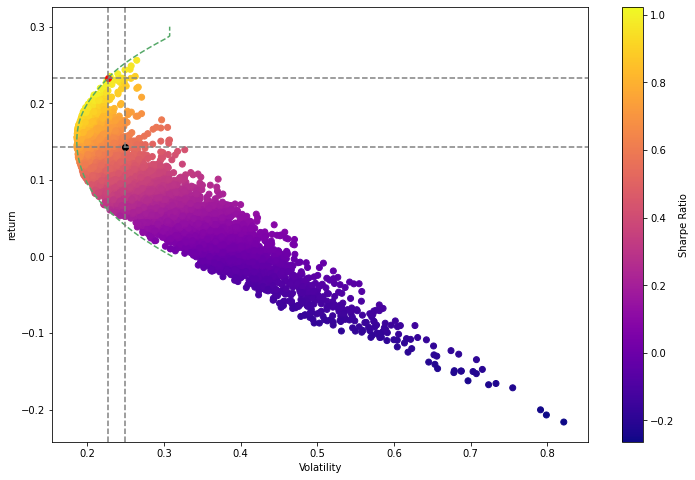

In [79]:
# calculated efficient frontier
plt.figure(figsize=(12,8))
plt.plot(frontier_volatility,frontier_y, 'g--');

#scatter-plot from monte carlo simulation
plt.scatter(vol_arr,ret_arr, c= sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('return')

max_sr_ret = ret_arr[2936]
max_sr_vol = vol_arr[2936]
print('monte_carlo x-value-max: ', max_sr_vol)
print('monte_carlo y-value-max:', max_sr_ret)
plt.scatter(max_sr_vol, max_sr_ret,  c='black');
plt.axhline(max_sr_ret, color='gray',linestyle='--')
plt.axvline(max_sr_vol, color='gray', linestyle='--');

max_sr_ret = max_sr_ret_calc
max_sr_vol = max_sr_vol_calc
print('sharpe ratio x-value-max: ', max_sr_vol)
print('sharpe ratio y-value-max:', max_sr_ret)
plt.scatter(max_sr_vol, max_sr_ret,  c='red');
plt.axhline(max_sr_ret, color='gray',linestyle='--')
plt.axvline(max_sr_vol, color='gray', linestyle='--');
        

In [80]:
frontier_sr = frontier_y / frontier_volatility
print(frontier_sr.max())

print(frontier_sr.argmax())

print(frontier_volatility[frontier_sr.argmax()])
print(frontier_y[frontier_sr.argmax()])


1.026778837331132
77
0.2272478988170695
0.23333333333333334
